# EAI6000 2023 Spring A Week 5 Assignment

## Section One - Conceptual Understanding

### <div class="alert alert-info">[GRADED  TASK 1.1]</div>
Please compare __maximum a posterior (MAP)__ hypothesis and __maximum likelihood estimation (MLE)__ hypothesis in your own understanding

__MLE__ determines the parameters that maximize the likelihood of observing the given data. For instance, if you have a coin and you're trying to figure out the probability of getting a heads (p), you'd toss the coin several times, and pick the p that best fits your observations.

__MAP__, on the other hand, incorporates prior knowledge or belief about the parameters, in addition to the data. It is based on Bayes' theorem. If you already believe the coin is slightly biased (say, p=0.6) before flipping, and want to update this belief based on the flips you observe, MAP would be more suitable.

In essence, MLE is about finding parameters that make the observed data most probable, while MAP is about finding the most probable parameters given the observed data and some prior belief. MAP becomes identical to MLE when the prior is uniform (i.e., when we have no prior belief).

### <div class="alert alert-info">[GRADED  TASK 1.2]</div>
Given following 12 samples from a restauant waiting dataset, please find the __root node__ building a decision tree among four attributes __{patron, type, rain, price}__. Please show the calculation which supports your decison. 
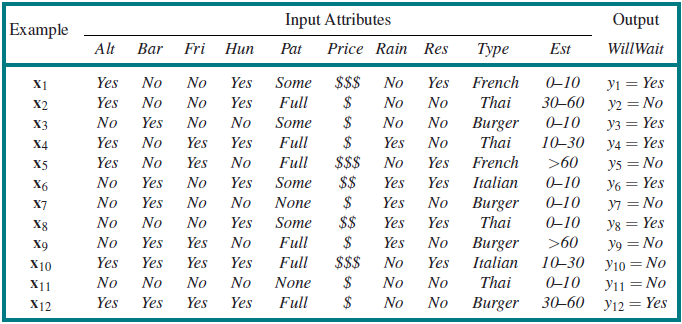

To build a decision tree, we must first choose the attribute that maximally reduces the entropy or impurity. This attribute will be the root of our decision tree. The common measures used to reduce the impurity or disorganization are Information Gain (based on entropy).

Here, we want to calculate the root node, and we are given four attributes: {patron, type, rain, price}. We will calculate the information gain for each attribute and the attribute with the highest information gain will be the root of our decision tree.

Before we go into the Python code, let's quickly summarize how the information gain is calculated:

Calculate the entropy of the target.
For each attribute:
Calculate the entropy of the target for each value of the attribute.
Take a weighted sum of these entropies.
Subtract this from the entropy of the target. This is the information gain.
Here is the Python code to calculate the information gain:

In [28]:
import pandas as pd
from typing import List
import numpy as np

proper_node = ''
info_gain = 0

def entropy(col: pd.Series) -> float:
    """
    Calculate the entropy of a dataset.
    """
    elements, counts = np.unique(col, return_counts = True)
    print(elements, counts)
    # counts[i] is the element count of yes or no, whereas np.sum(counts) is the total count in this category
    entropy = -np.sum([(counts[i] / np.sum(counts))*np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    print(entropy)
    return entropy

def InfoGain(df: pd.DataFrame, split_attribute: str, target: str) -> float:
    """
    Calculate the information gain of a dataset.
    """
    # Calculate the entropy of the total dataset
    total_entropy = entropy(df[target])

    # Calculate the values and the corresponding counts for the split attribute 
    vals, counts = np.unique(df[split_attribute], return_counts=True)
    
    # Calculate the weighted entropy
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(df.where(df[split_attribute] == vals[i]).dropna()[target]) for i in range(len(vals))])
    
    # Calculate the information gain
    Information_Gain = total_entropy - weighted_entropy
    global info_gain
    global proper_node
    if Information_Gain > info_gain:
        info_gain = Information_Gain
        proper_node = split_attribute
    return Information_Gain

# Create the dataset
data = {
    'patron': ['Some', 'Full', 'Some', 'Full', 'Full', 'Some', 'None', 'Some', 'Full', 'Full', 'None', 'Full'],
    'type': ['French', 'Thai', 'Burger', 'Thai', 'French', 'Italian', 'Burger', 'Thai', 'Burger', 'Italian', 'Thai', 'Burger'],
    'rain': ['No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'price': ['£ £ £', '£', '£', '£', '£ £ £', '£ £', '£', '£ £', '£', '£ £ £', '£', '£'],
    'wait': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Calculate the information gain of each attribute
for attr in ['patron', 'type', 'rain', 'price']:
    print(f'InfoGain({attr}) = {InfoGain(df, attr, "wait")}')
    

# whats the proper root node?
print(f'The proper node is {proper_node}, where the info gain is {info_gain}')


['No' 'Yes'] [6 6]
1.0
['No' 'Yes'] [4 2]
0.9182958340544896
['No'] [2]
-0.0
['Yes'] [4]
-0.0
InfoGain(patron) = 0.5408520829727552
['No' 'Yes'] [6 6]
1.0
['No' 'Yes'] [2 2]
1.0
['No' 'Yes'] [1 1]
1.0
['No' 'Yes'] [1 1]
1.0
['No' 'Yes'] [2 2]
1.0
InfoGain(type) = 0.0
['No' 'Yes'] [6 6]
1.0
['No' 'Yes'] [4 3]
0.9852281360342515
['No' 'Yes'] [2 3]
0.9709505944546686
InfoGain(rain) = 0.020720839623908027
['No' 'Yes'] [6 6]
1.0
['No' 'Yes'] [4 3]
0.9852281360342515
['Yes'] [2]
-0.0
['No' 'Yes'] [2 1]
0.9182958340544896
InfoGain(price) = 0.19570962879973086
The proper node is patron, where the info gain is 0.5408520829727552


Here, 'patron' has the highest information gain (0.54085), so 'patron' would be the root node of the decision tree.

## Section Two - Repeated k-Fold Cross-Validation

Use the following code base to investigate k-fold cross validation in Python and the sklearn library.

You can read the original article from the link
[Repeated k-Fold Cross-Validation for Model Evaluation in Python](https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/)

In [27]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))

Accuracy: 0.86733 (0.03130)


### <div class="alert alert-info">[GRADED  TASK 2.1]</div>
Use following settings to adapt the code and show the result 
- apply __2023__ for all the random_state  
- create __5000__ samples
- set number of features for the samples as __36__
- set number of repeats for the k-fold CV as __5__


In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
# here we create 5000 samples, set n_features to be 36, and random state to be 2023
X, y = make_classification(n_samples=5000, n_features=36, n_informative=30, n_redundant=6, random_state=2023)

# prepare the cross-validation procedure
# here we set cv as 5
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2023)

# create model
model = LogisticRegression(max_iter=5000)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))


Accuracy: 0.82912 (0.01422)


### <div class="alert alert-info">[GRADED  TASK 2.2]</div>
Try to improve the accuracy, explain your approaches, and report your results



To improve the accuracy, we can tune the hyperparameters of the logistic regression model. We'll use a simple grid search approach for this purpose, using Scikit-learn's GridSearchCV. We'll tune the regularization strength C and the type of regularization penalty (L1 or L2).

In [5]:
from sklearn.model_selection import GridSearchCV

# create model
model = LogisticRegression(max_iter=5000)

# define search space
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'solver': ['liblinear']
}

# define search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# execute search
grid_result = grid_search.fit(X, y)

# summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# evaluate model with optimized parameters
best_model = LogisticRegression(**grid_result.best_params_)
scores = cross_val_score(best_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))


Best: 0.829600 using {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.82956 (0.01537)


Here, the accuracy increased from 0.82912 to 0.82956, with a 0.00044 of increase. Apparently, the increase is not significant enough. I then want to try some different models since LR is a linear model, if the underlying relationship in the data is not linear, this model might not give the best results. Therefore, I am trying random forest below.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# create model
model = RandomForestClassifier(random_state=2023)

# define search space
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# execute search
grid_result = grid_search.fit(X, y)

# summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# evaluate model with optimized parameters
best_model = RandomForestClassifier(**grid_result.best_params_, random_state=2023)
scores = cross_val_score(best_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))


Best: 0.922667 using {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.92267 (0.03032)


Now I tried random forest with gridsearch, and we got a significant accuracy performance boost from 0.82956 to 0.92267. The fact that we saw a significant improvement in accuracy suggests that the data might contain complex patterns or interactions that the Random Forest is able to capture.

### <div class="alert alert-info">[GRADED  TASK 2.3]</div>
Try to build an ensemble model with __stacking__ method, explain your approaches, and report your results
. 

In the following code, I will use three different types of models (Random Forest, Gradient Boosting, and SVM) as base learners, and Logistic Regression as the meta-learner. Stacking is an ensemble learning technique that uses predictions from multiple models (base learners) to build a new model (meta-learner or second-level learner).

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create base learners with the same random state of 2023
base_learners = [
                 ('rf', RandomForestClassifier(n_estimators=10, random_state=2023)),
                 ('gb', GradientBoostingClassifier(n_estimators=10, random_state=2023)),
                 ('svm', SVC(probability=True, random_state=2023))
                ]

# Initialize Stacking Classifier with the Meta Learner
model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))


Accuracy: 0.95367 (0.02331)


Apparently, stacking is a powerful method for improving the performance of machine learning models. The significant increase in accuracy from 0.92267 to 0.95367 shows that the ensemble model was able to capture more complex patterns in the data and make more accurate predictions. The standard deviation also increased slightly compared to the original 0.015, which suggests there is some variance in the model's performance across different cross-validation folds. However, given the significant increase in accuracy from 0.82, this is likely an acceptable trade-off.